<a href="https://colab.research.google.com/github/Arpit1314/capstone-project-1-EDA-of-play-store-analysis/blob/main/Copy_of_Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing Libraries


In [9]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import google.colab
warnings.filterwarnings('ignore')
#import plotly.plotly as plot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Reading data sample files

In [10]:
#Importing the Data Set.
data_store_path = '/content/Play Store Data.csv'
user_review_path = '/content/User Reviews.csv'
data_frame1 = pd.read_csv(data_store_path)
data_frame2 = pd.read_csv(user_review_path)

#Number and names of the columns in data_frame1
print("Number of Rows and columns data_frame1 has :",data_frame1.shape,"\n")
print("Name of the columns in data frame1",data_frame1.columns,"\n")

#Number and names of the columns in data_frame2
print("Number of Rows and columns data_frame2 has :",data_frame2.shape,"\n")
print("Name of the columns in data frame2",data_frame2.columns,"\n")

Number of Rows and columns data_frame1 has : (10841, 13) 

Name of the columns in data frame1 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 

Number of Rows and columns data_frame2 has : (64295, 5) 

Name of the columns in data frame2 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object') 



**To check and remove null values from both the data frames**

In [11]:
# null values from data frame1
print("Total null values contains in each column in data_frame1",data_frame1.isnull().sum(),"\n")

# null values from data frame2
print("Total null values contains in each column in data_frame2",data_frame2.isnull().sum())

# Removing null from data frame1
data_frame1.dropna(inplace=True,axis=0)

# Removing null from data frame2
data_frame2.dropna(inplace=True,axis=0)

Total null values contains in each column in data_frame1 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64 

Total null values contains in each column in data_frame2 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


**Data visualization**


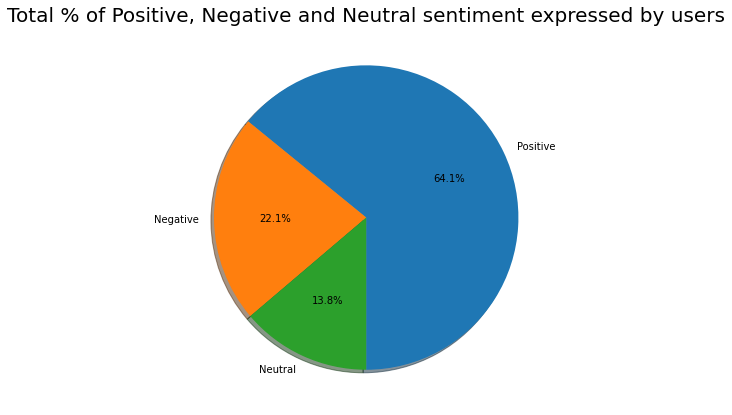

In [12]:
#Users Sentiment towards applications
plt.figure(figsize=(10,7))
labels =data_frame2['Sentiment'].value_counts(sort = True).index
sizes = data_frame2['Sentiment'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total % of Positive, Negative and Neutral sentiment expressed by users',size = 20)
plt.show()

**Category and Reviews**

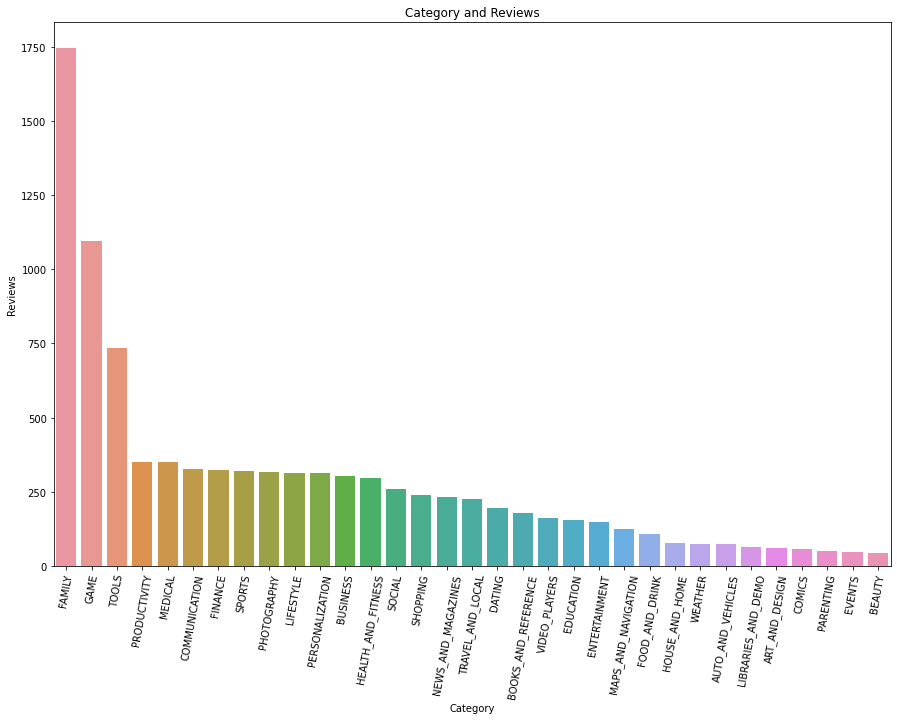

In [13]:
from itertools import count
category_list = list(data_frame1['Category'].unique())
category_review = []
for i in category_list:
    x = data_frame1[data_frame1['Category'] == i]
    if(len(x)!=0):
        review = len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()


**Content Rating **

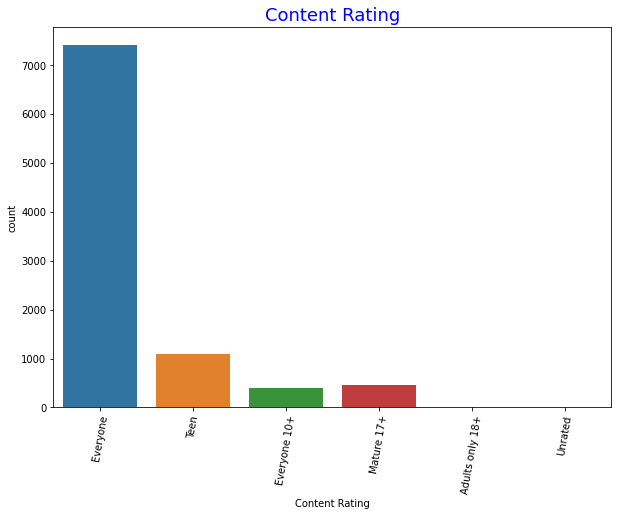

In [14]:
# this visualization will display Content rating
plt.figure(figsize=(10,7))
sns.countplot(data=data_frame1, x="Content Rating")
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=18)
plt.show()

**Sentiment analysis of user reviews on paid and free applications**

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

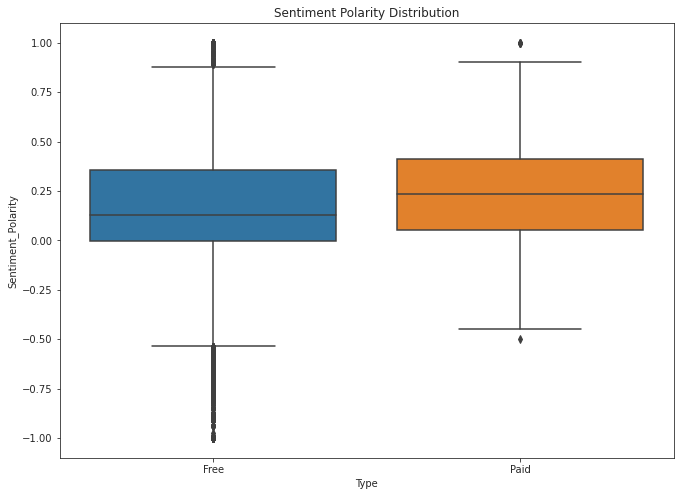

In [15]:
# Join the two dataframes
merged_df = data_frame2.merge(data_frame1, on='App')

# Drop NA values from Sentiment columns
merged_df = merged_df.dropna(subset = ['Sentiment'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

**Visualization of Paid applications on the basis of category**

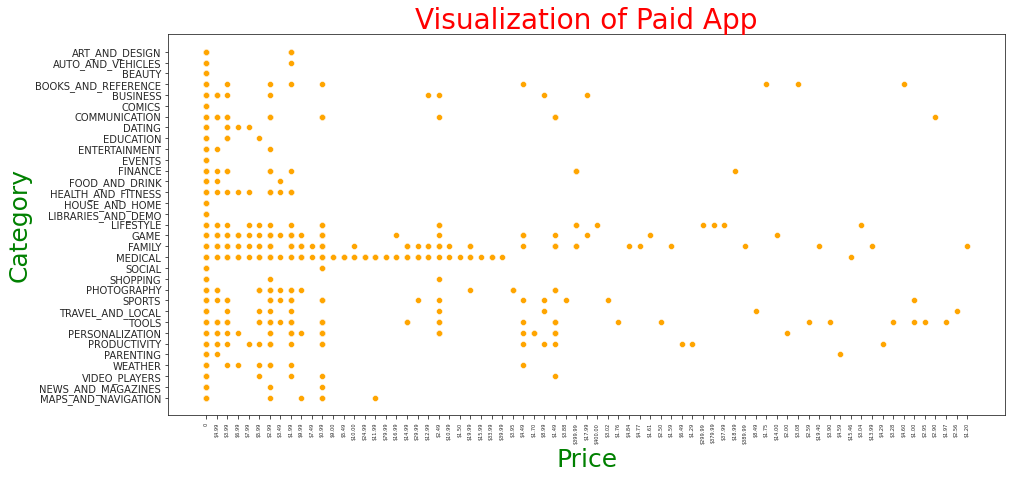

In [16]:
#this is a Visualization of Paid applications
plt.figure(figsize=(15,7)) 
sns.scatterplot(data=data_frame1,y="Category",x='Price',color="orange")
plt.xticks(rotation='vertical',size=5)
plt.xlabel("Price",size=25,c="g")
plt.ylabel("Category",size=25,c="g")
plt.title("Visualization of Paid App",size=28,c="r")
plt.show()

**Conclusion**

We have completed EDA and Data Visualization on Google play store on the basis of application details and user review and ratings.